<a href="https://colab.research.google.com/github/TurboPug2101/Crypto_Guides/blob/main/Bitcoin_Price_prediction_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


In [45]:
data_btc=yf.download('BTC-USD',start='2020-08-15',end='2022-08-15',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [46]:
data_btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-15,11768.697266,11963.203125,11768.697266,11865.698242,11865.698242,23354924400
2020-08-16,11866.685547,11934.901367,11737.188477,11892.803711,11892.803711,20583375490
2020-08-17,11895.658203,12359.056641,11806.696289,12254.402344,12254.402344,28227687027
2020-08-18,12251.895508,12335.707031,11954.525391,11991.233398,11991.233398,26043227672
2020-08-19,11990.884766,12028.923828,11687.333008,11758.283203,11758.283203,24502851117
...,...,...,...,...,...,...
2022-08-10,23162.898438,24127.414062,22771.519531,23947.642578,23947.642578,32837431722
2022-08-11,23948.345703,24822.628906,23900.996094,23957.529297,23957.529297,37127036580
2022-08-12,23957.203125,24412.566406,23657.265625,24402.818359,24402.818359,27265804688


In [47]:

def value_for_date(date):
    return date

In [48]:
def preprocess_dataframe(dataset):
    # Assign values to the 'Date' column based on index
    dataset['Date'] = [value_for_date(date) for date in dataset.index]
    data_btc['Date'] = pd.to_datetime(data_btc['Date'])

    # Reset index and create a new index with sequential integers
    dataset.reset_index(drop=True, inplace=True)
    dataset.index = range(1, len(dataset) + 1)

    # Drop the 'Adj Close' column
    #  dataset.drop('Adj Close', axis=1, inplace=True)

    return dataset

In [49]:
data_btc=preprocess_dataframe(data_btc)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

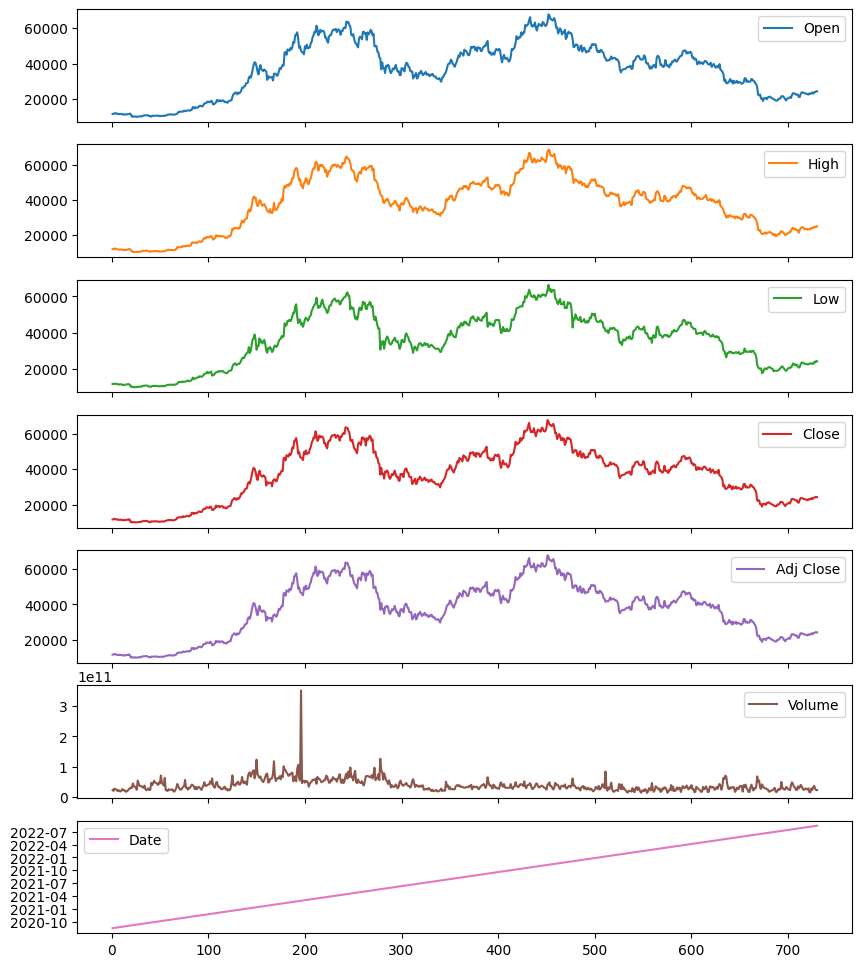

In [50]:
data_btc.plot(subplots=True, figsize=(10,12))


In [51]:
df=data_btc

In [52]:
# Check for Null values
print("Null values:", df.isnull().values.sum())

# Check for NA values
print("NA values:", df.isna().values.any())

# Check for Duplicate values
print("Duplicate values:", df.duplicated().sum())


Null values: 0
NA values: False
Duplicate values: 0


#### Time Series Analysis (Trend, Seasonality, Residual)
Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.


In [53]:
import statsmodels.api as sm

In [54]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
train = df.resample('D').interpolate(method='linear')

time_series = train['Close']
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

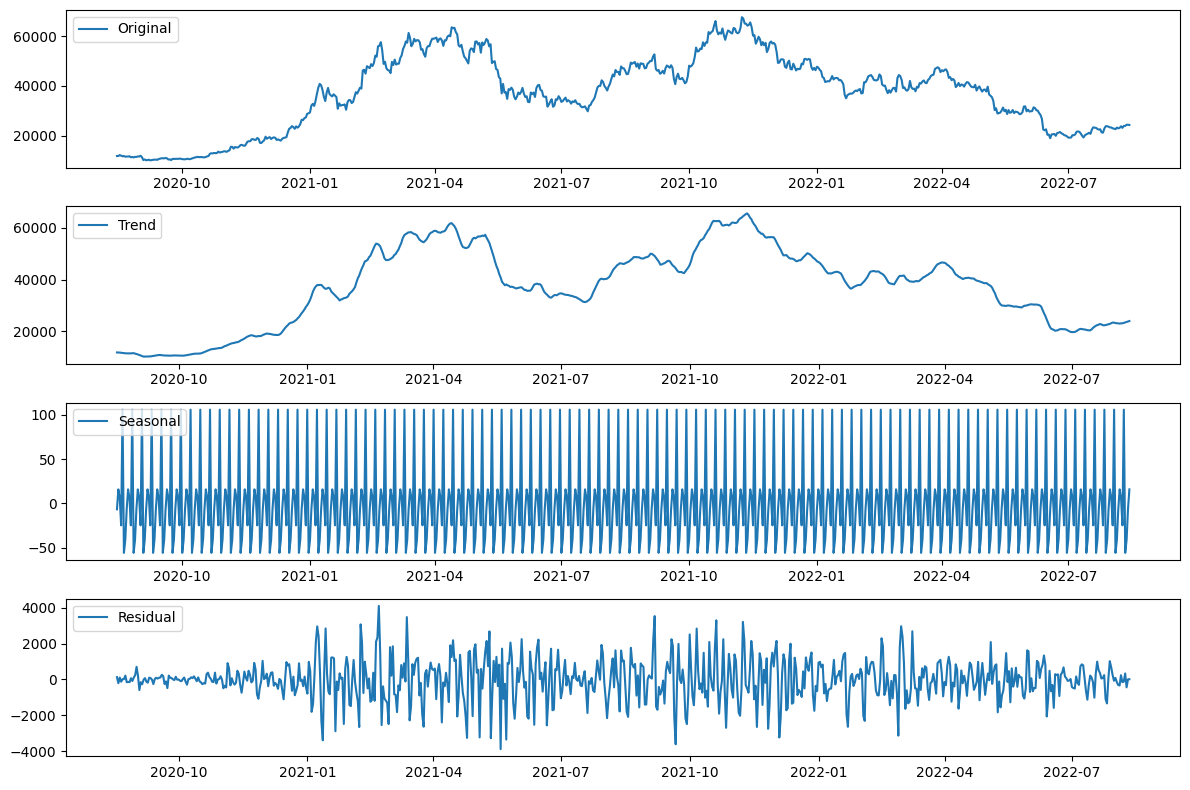

In [55]:
# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The trend component represents the long-term movement or general direction in the data. It captures the underlying, gradual changes in the time series over a more extended period.

The seasonality component reflects the repeating patterns or fluctuations in the data that occur at fixed intervals, typically within a year or a shorter time frame.

The residuals, also known as errors or noise, are the leftover variations in the time series data that cannot be explained by the trend or seasonality components.

#### ADF (Augmented Dickey-Fuller) Test
The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [56]:
adf_test_result = sm.tsa.adfuller(df['Close'])
adf_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print('The time series is likely stationary (reject the null hypothesis).')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis).')

ADF Statistic: -1.7481652532077407
p-value: 0.4064825629889122
Critical Values:
   1%: -3.4393520240470554
   5%: -2.8655128165959236
   10%: -2.5688855736949163
The time series is likely non-stationary (fail to reject the null hypothesis).


In [57]:
# First-Order differencing
df['First_Difference'] = df['Close'].diff()
df.dropna(inplace=True)

In [58]:
#Check for stationarity

adf_test_result = sm.tsa.adfuller(df['First_Difference'])
adf_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print('The time series is likely stationary (reject the null hypothesis).')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis).')

ADF Statistic: -27.772524982670518
p-value: 0.0
Critical Values:
   1%: -3.4393644334758475
   5%: -2.8655182850048306
   10%: -2.568888486973192
The time series is likely stationary (reject the null hypothesis).


#### ACF & PACF Plots (to find p,d,q) values

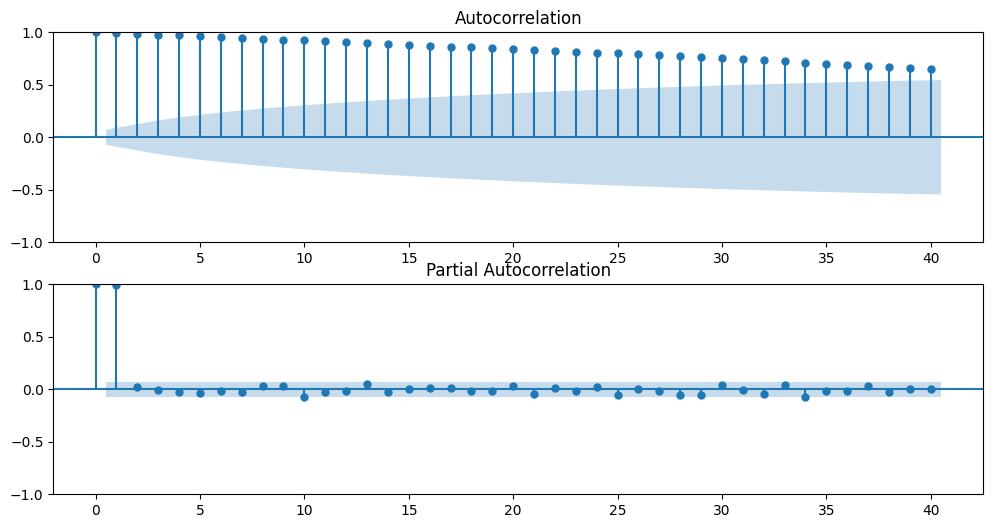

In [59]:

time_series_data = df['Close']
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6))
sm.graphics.tsa.plot_acf(time_series_data, lags = 40, ax=ax1)
sm.graphics.tsa.plot_pacf(time_series_data, lags = 40, ax=ax2, method='ywm')
plt.show()


In [60]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.5 MB/s eta 0:00:00


In [61]:
import pmdarima as pm

In [37]:
!pip install pmdarima

p (AutoRegressive Order): Represents how many past values of the series are used to predict the future.

d (Integrated Order): Indicates the number of differences needed to make the series stationary.

q (Moving Average Order): Represents how many past prediction errors are used to refine future predictions.

In [62]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
train_size = int(len(df)*0.8)
train_data = df['Close'][:train_size]
test_data = df['Close'][train_size:]

print(len(train_data), len(test_data))


583 146


In [64]:
from pmdarima import auto_arima

In [65]:
stepwise_fit = auto_arima(df['Close'], trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12741.987, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12743.417, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12743.431, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12740.079, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12745.423, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.940 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  729
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6369.040
Date:                Sat, 28 Oct 2023   AIC                          12740.079
Time:                        09:45:07   BIC                          12744.670
Sample:                    08-16-2020   HQIC                         12741.850
          

In [66]:
model = sm.tsa.arima.ARIMA(df['Close'], order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [67]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  729
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6365.302
Date:                Sat, 28 Oct 2023   AIC                          12740.604
Time:                        09:45:12   BIC                          12763.555
Sample:                    08-16-2020   HQIC                         12749.460
                         - 08-14-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8175      0.040     20.546      0.000       0.740       0.896
ar.L2         -0.9412      0.036    -26.255      0.000      -1.011      -0.871
ma.L1         -0.8512      0.039    -21.980      0.000      -0.927      -0.775
ma.L2          0.9531      0.034     28.174      0.000       0.887       1.019
sigma2      2.346e+06   8.24e+04     28.478      0.000    2.18e+06    2.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               259.32
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.22
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start, end=end)
pred_array=pred.values
pred_array

array([41108.0190909 , 42339.05960472, 42844.81354639, 43909.16828731,
       44350.22923158, 44550.94532392, 46785.38979579, 47067.66644787,
       47440.11777742, 47115.97996395, 45655.00658197, 46286.64022649,
       45785.08863416, 46352.80226467, 46618.11066109, 45686.10220286,
       43388.26336605, 43496.31896872, 42152.75395232, 42643.30782397,
       42243.33810004, 39768.21578821, 40250.42569794, 41009.06389521,
       39737.71969366, 40499.86935505, 40579.10668429, 39921.95284888,
       40807.52737601, 41281.88947931, 41216.58470002, 40630.56088398,
       39994.97549604, 39604.29140575, 39324.20380735, 40189.22592646,
       38117.36294194, 39431.73127157, 39931.63018677, 38608.04025844,
       37579.21441968, 38319.23170148, 38538.03360057, 37927.66152403,
       39766.00093797, 36592.26187285, 35971.77607493, 35438.56092319,
       34113.38498428, 30512.98412762, 31085.87546802, 28863.00385682,
       28896.65181533, 29217.79811565, 30164.939573  , 31390.76144483,
      

In [69]:
x=np.arange(len(test_data))

In [81]:
x.shape

(146,)

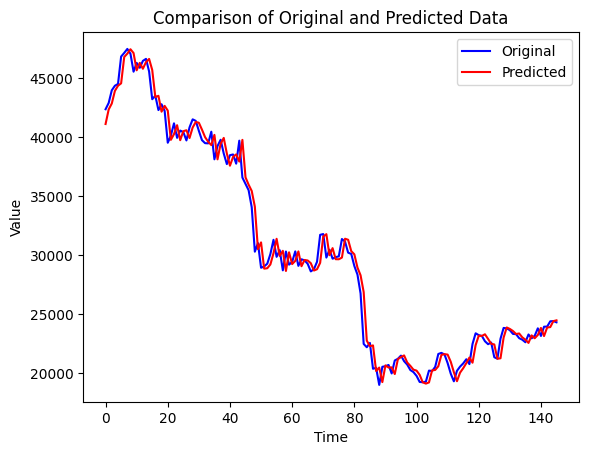

In [45]:

plt.plot(x,test_data,label='Original', color='blue')
plt.plot(x,pred_array,label='Predicted', color='orange',linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Original and Predicted Data')
plt.legend()

# Show the plot
plt.show()

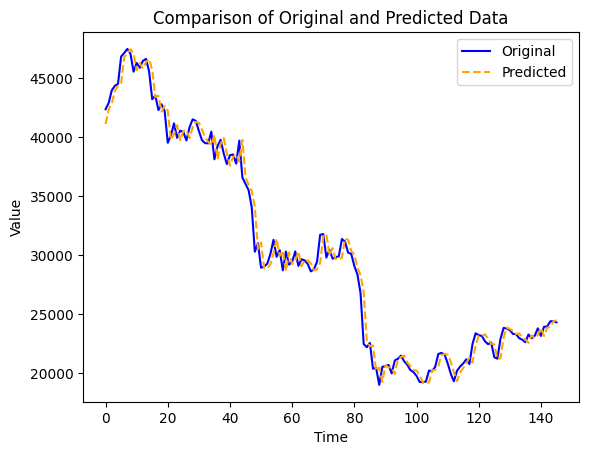

In [83]:

plt.plot(x,test_data,label='Original', color='blue')
plt.plot(x,pred_array,label='Predicted', color='orange',linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Original and Predicted Data')
plt.legend()

# Show the plot
plt.show()

In [76]:
y=np.arange(len(train_data))

In [80]:
pred_array.shape

(146,)

In [84]:

# # Plot original training data
# plt.plot(y,train_data, label='Original Training Data')

# # Plot predicted training data (adjusting indices)
# plt.plot(y, pred_array, label='Predicted Training Data', linestyle='--')


# plt.title('Original vs Training Values')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()







()

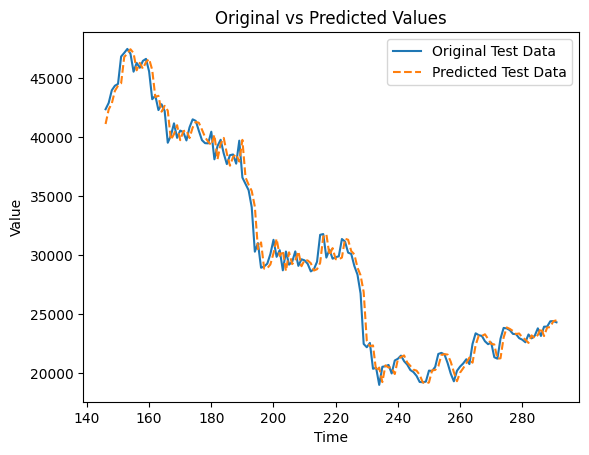

In [82]:

# Plot original test data
plt.plot(range(len(test_data), len(test_data) + len(test_data)), test_data, label='Original Test Data')

# Plot predicted test data (adjusting indices)
plt.plot(range(len(pred_array), len(pred_array) + len(pred_array)), pred_array, label='Predicted Test Data', linestyle='--')

plt.title('Original vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [86]:
print("RMSE: ", math.sqrt(mean_squared_error(test_data,pred_array)))
mse = mean_squared_error(test_data,pred_array)
mae = mean_absolute_error(test_data,pred_array)
r2 = r2_score(test_data,pred_array)

print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", r2)

RMSE:  1054.283291049266
MSE:  1111513.2577856714
MAE:  760.2950983141845
R2 Score:  0.9856679206604289


#Ranom Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor


In [102]:
df=yf.download('BTC-USD',start='2020-08-15',end='2022-08-15',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [105]:
data_btc=df

In [106]:
df=preprocess_dataframe(data_btc)


In [107]:
df=df[["Date","Close"]]

Normalizing data

In [108]:

del df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [113]:
train_size = int(len(df)*0.8)
train_data = df[:train_size]
test_data = df[train_size:]

print(len(train_data), len(test_data))


584 146


In [116]:
X_train = train_data.reshape(-1, 1)  # Reshaping the data for model input
y_train = df[:train_size]
X_test = test_data.reshape(-1, 1)
y_test = df[train_size:]

In [119]:
X_train.shape

(584, 1)

In [153]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=10, random_state=3)  # You can adjust n_estimators as needed
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Training the model
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomForestRegressor(n_estimators=10, random_state=3)

In [154]:
predicted_prices = rf_model.predict(X_test)
train_predict= rf_model.predict(X_train)

In [155]:
print(predicted_prices.shape)
print(train_predict.shape)

(146,)
(584,)


In [156]:
# predicted_prices

In [157]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict.reshape(-1,1))
test_predict = scaler.inverse_transform(predicted_prices.reshape(-1,1))
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

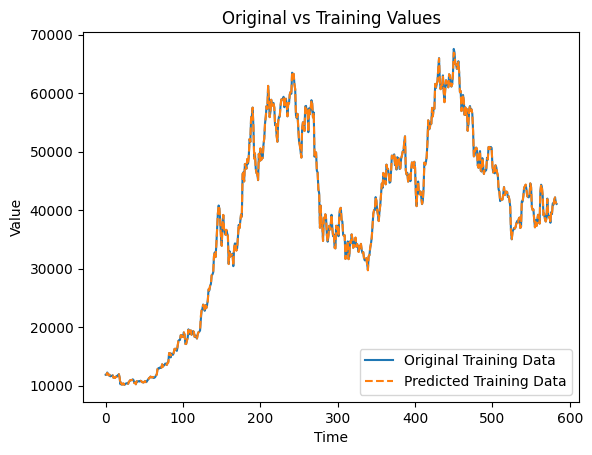

In [158]:
# Plot original training data
plt.plot(original_ytrain, label='Original Training Data')

# Plot predicted training data (adjusting indices)
plt.plot(range(0, len(train_predict)), train_predict, label='Predicted Training Data', linestyle='--')


plt.title('Original vs Training Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

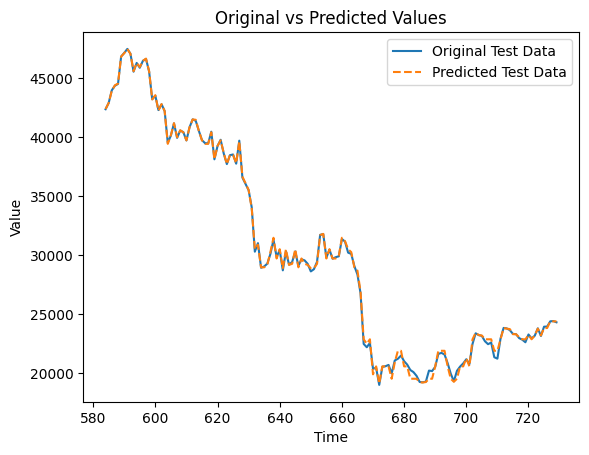

In [159]:

# Plot original test data
plt.plot(range(len(original_ytrain), len(original_ytrain) + len(original_ytest)), original_ytest, label='Original Test Data')

# Plot predicted test data (adjusting indices)
plt.plot(range(len(train_predict), len(train_predict) + len(test_predict)), test_predict, label='Predicted Test Data', linestyle='--')

plt.title('Original vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [160]:
print("RMSE: ", math.sqrt(mean_squared_error(X_test,predicted_prices)))
mse = mean_squared_error(X_test,predicted_prices)
mae = mean_absolute_error(X_test,predicted_prices)
r2 = r2_score(X_test,predicted_prices)

print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", r2)

RMSE:  0.003723506569244319
MSE:  1.3864501171205598e-05
MAE:  0.0023169055036561816
R2 Score:  0.9994102651848645


# LSTM

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [7]:
data_btc=yf.download('BTC-USD',start='2020-08-15',end='2022-08-15',interval='1d')
def value_for_date(date):
    return date
def preprocess_dataframe(dataset):
    # Assign values to the 'Date' column based on index
    dataset['Date'] = [value_for_date(date) for date in dataset.index]
    data_btc['Date'] = pd.to_datetime(data_btc['Date'])

    # Reset index and create a new index with sequential integers
    dataset.reset_index(drop=True, inplace=True)
    dataset.index = range(1, len(dataset) + 1)

    # Drop the 'Adj Close' column
    #  dataset.drop('Adj Close', axis=1, inplace=True)

    return dataset
data_btc=preprocess_dataframe(data_btc)


[*********************100%%**********************]  1 of 1 completed


In [8]:
data_btc

,Open,High,Low,Close,Adj Close,Volume,Date
1,11768.697266,11963.203125,11768.697266,11865.698242,11865.698242,23354924400,2020-08-15
2,11866.685547,11934.901367,11737.188477,11892.803711,11892.803711,20583375490,2020-08-16
3,11895.658203,12359.056641,11806.696289,12254.402344,12254.402344,28227687027,2020-08-17
4,12251.895508,12335.707031,11954.525391,11991.233398,11991.233398,26043227672,2020-08-18
5,11990.884766,12028.923828,11687.333008,11758.283203,11758.283203,24502851117,2020-08-19
...,...,...,...,...,...,...,...
726,23162.898438,24127.414062,22771.519531,23947.642578,23947.642578,32837431722,2022-08-10
727,23948.345703,24822.628906,23900.996094,23957.529297,23957.529297,37127036580,2022-08-11
728,23957.203125,24412.566406,23657.265625,24402.818359,24402.818359,27265804688,2022-08-12
729,24402.187500,24860.050781,24346.115234,24424.068359,24424.068359,22987346289,2022-08-13


In [9]:
data_btc = data_btc[data_btc['Date'] > '2020-01-19']
close_stock = data_btc.copy()
print("Total data for prediction: ",data_btc.shape[0])

Total data for prediction:  730


In [10]:
data_btc=data_btc[["Date","Close"]]

Normalizing Data

In [11]:

del data_btc['Date']
scaler=MinMaxScaler(feature_range=(0,1))
data_btc=scaler.fit_transform(np.array(data_btc).reshape(-1,1))

In [14]:
training_size=int(len(data_btc)*0.80)
test_size=len(data_btc)-training_size
train_data,test_data=data_btc[0:training_size,:],data_btc[training_size:len(data_btc),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (584, 1)
test_data:  (146, 1)


In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (568, 15)
y_train:  (568,)
X_test:  (130, 15)
y_test (130,)


In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (568, 15, 1)
X_test:  (130, 15, 1)


In [29]:
%%time
# Model
model = Sequential()
model.add(LSTM(32,input_shape=(None,1),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae') #rmse?
model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
36/36 [==============================] - 5s 67ms/step - loss: 0.2684
Epoch 2/50
36/36 [==============================] - 2s 66ms/step - loss: 0.0751
Epoch 3/50
36/36 [==============================] - 2s 48ms/step - loss: 0.0689
Epoch 4/50
36/36 [==============================] - 2s 50ms/step - loss: 0.0614
Epoch 5/50
36/36 [==============================] - 2s 49ms/step - loss: 0.0596
Epoch 6/50
36/36 [==============================] - 2s 48ms/step - loss: 0.0599
Epoch 7/50
36/36 [==============================] - 2s 54ms/step - loss: 0.0565
Epoch 8/50
36/36 [==============================] - 3s 80ms/step - loss: 0.0557
Epoch 9/50
36/36 [==============================] - 2s 47ms/step - loss: 0.0541
Epoch 10/50
36/36 [==============================] - 2s 49ms/step - loss: 0.0520
Epoch 11/50
36/36 [==============================] - 2s 49ms/step - loss: 0.0529
Epoch 12/50
36/36 [==============================] - 2s 48ms/step - loss: 0.0489
Epoch 13/50
36/36 [==================

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [31]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [32]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9655998961771591
Test data explained variance regression score: 0.9397970980399352


In [33]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3104.3037042922856
Train data MSE:  9636701.488482807
Train data MAE:  2325.38798587423
-------------------------------------------------------------------------------------
Test data RMSE:  2381.511193452092
Test data MSE:  5671595.564537606
Test data MAE:  1733.1314753605768


In [34]:
r2 = r2_score(original_ytest, test_predict)
print("R-squared:", r2)


R-squared: 0.899490185784223


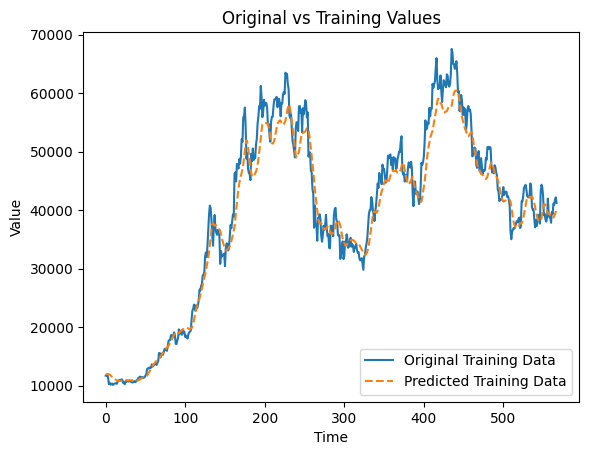

In [42]:
# Plot original training data
plt.plot(original_ytrain, label='Original Training Data')

# Plot predicted training data (adjusting indices)
plt.plot(range(0, len(train_predict)), train_predict, label='Predicted Training Data', linestyle='--')


plt.title('Original vs Training Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()







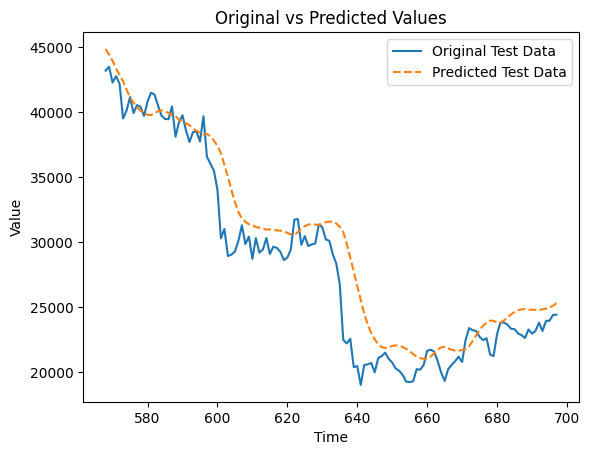

In [43]:

# Plot original test data
plt.plot(range(len(original_ytrain), len(original_ytrain) + len(original_ytest)), original_ytest, label='Original Test Data')

# Plot predicted test data (adjusting indices)
plt.plot(range(len(train_predict), len(train_predict) + len(test_predict)), test_predict, label='Predicted Test Data', linestyle='--')

plt.title('Original vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
